**EEP 596 Programming Assignment 1**

**Qingchuan Hou**

**Jan 13, 2022**

# 1. Set Up

## Colab Environment

### Notebook Setup:
Load dataset using the pandas library. Print the first few lines of this data in the notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
MLdataset = pd.read_csv("train-2.csv", sep=',')

In [ ]:
MLdataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

### Categorical variable
Pick any categorical variable in the attributes of the data set and use an appropriate pandas library to create dummy attributes that capture the values of the categorical variable.

In [ ]:
neighbor = pd.get_dummies(MLdataset['Neighborhood'])
print(neighbor)

      Blmngtn  Blueste  BrDale  BrkSide  ...  Somerst  StoneBr  Timber  Veenker
0           0        0       0        0  ...        0        0       0        0
1           0        0       0        0  ...        0        0       0        1
2           0        0       0        0  ...        0        0       0        0
3           0        0       0        0  ...        0        0       0        0
4           0        0       0        0  ...        0        0       0        0
...       ...      ...     ...      ...  ...      ...      ...     ...      ...
1455        0        0       0        0  ...        0        0       0        0
1456        0        0       0        0  ...        0        0       0        0
1457        0        0       0        0  ...        0        0       0        0
1458        0        0       0        0  ...        0        0       0        0
1459        0        0       0        0  ...        0        0       0        0

[1460 rows x 25 columns]


### Numeric Variable
Pick any numeric attribute from the list of attributes and plot a histogram of the values of the attribute in the data set. Use Matplotlib library to do so.

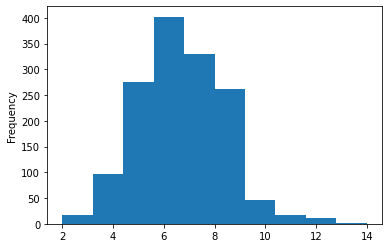

In [ ]:
Rms = MLdataset['TotRmsAbvGrd']

Rms.plot(kind='hist',x='TotRmsAbvGrd')

plt.show()

# 2. Housing Prices Data Set

## Data Set
You are given two data sets train.csv and test.csv

### Inspect the data set using Pandas and print first 10 lines

In [ ]:
df = pd.read_csv("train-2.csv", sep=',')
df_test = pd.read_csv("test_data_with_target-1.csv", sep=',')

In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [ ]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,121248.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,155260.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189430.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,193422.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,190437.0
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,...,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,176254.0
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,...,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,172914.0
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,...,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,167271.0
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,...,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,186209.0
9,1470,20,RL,70.0,84

### How many attributes does the data set have and how many data points ?
 

In [ ]:
print(df.shape)
print(df_test.shape)

(1460, 81)
(1459, 81)


There are 81 columns in the train data. Without the traning result 'price', and also the title of house 'Id' There are 79 attributes in this dataset. There are 1460 samples. So there are 1460 x 79 = 115340 data points.

## Linear Regression Model

### Pre-processing
You want to fit a linear regression model. Before that, you want to get the data in shape. What pre-processing would you implement to do just that?

In [ ]:
# The 'Id' is not the attribute for this dataset. it's not useful for tranning. so I remove it.
df = df.drop(columns = ['Id'])

#### Remove Missing Values 

First, there are some missing vlues in this data. To deal with these missing data. I chose to remove some useless data.

My approch is if an attribute had more than 10 percent of NaN values then I removed the column. Then I removed the samples that had NaN values in it

In [ ]:
df_dropN = df.loc[:, df.isnull().mean() < .1]
df_dropN = df_dropN.dropna(0)
print(df_dropN.shape)

(1338, 74)


I did the same drop step on the test data. For test dataset, I droped the columns which I droped on train set. Then removed the samplees that have missing values. 

In [ ]:
a = np.setxor1d(df.columns, df_dropN.columns)
print (a)

# Do both drop setp on the test data
df_test_dropN = df_test.drop(columns = a)
df_test_dropN = df_test_dropN.drop(columns = ['Id'])            # drop the 'Id' column
df_test_dropN = df_test_dropN.dropna(0)
print(df_test_dropN.shape)


['Alley' 'Fence' 'FireplaceQu' 'LotFrontage' 'MiscFeature' 'PoolQC']
(1319, 74)


#### Numerucal Data Normalization
Then I need normalize the numerical data using Mean Normalization: X = (X – column_mean) / (column_max – column_min).

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df_dropN = df_dropN.select_dtypes(include=numerics)

# Same on test data
num_df_test_dropN = df_test_dropN.select_dtypes(include=numerics)

In [ ]:
df_mean_column = num_df_dropN.mean(axis=0)
df_max_column = num_df_dropN.max(axis=0)
df_min_column = num_df_dropN.min(axis=0)

In [ ]:
num_df_dropN_norm = (num_df_dropN - df_mean_column) / (df_max_column - df_min_column)
print(num_df_dropN_norm)

# Same on test data and using same mean, max, and min.
num_df_test_dropN_norm = (num_df_test_dropN - df_mean_column) / (df_max_column - df_min_column)
print(num_df_test_dropN_norm)

      MSSubClass   LotArea  OverallQual  ...    MoSold   YrSold  SalePrice
0       0.022729 -0.010546     0.097534  ... -0.393804  0.04858   0.030205
1      -0.212565 -0.005171    -0.027466  ... -0.121076 -0.20142  -0.007311
2       0.022729  0.002541     0.097534  ...  0.242560  0.04858   0.051047
3       0.081553 -0.005405     0.097534  ... -0.393804 -0.45142  -0.064975
4       0.022729  0.016610     0.222534  ...  0.515287  0.04858   0.087869
...          ...       ...          ...  ...       ...      ...        ...
1455    0.022729 -0.013037    -0.027466  ...  0.151651 -0.20142  -0.016343
1456   -0.212565  0.011539    -0.027466  ... -0.393804  0.54858   0.032289
1457    0.081553 -0.007779     0.097534  ... -0.121076  0.54858   0.110795
1458   -0.212565 -0.004624    -0.152466  ... -0.211985  0.54858  -0.062022
1459   -0.212565 -0.003596    -0.152466  ... -0.030167  0.04858  -0.054554

[1338 rows x 36 columns]
      MSSubClass   LotArea  OverallQual  ...    MoSold   YrSold  SalePrice

#### Categorical Data Processing

For categorical variables, I using `pd.get_dummies()` to process.

In [ ]:
# Finde the dataframe only have categorical data
cat_df_dropN = df_dropN.select_dtypes(exclude=numerics)

# Same on test data
cat_df_test_dropN = df_test_dropN.select_dtypes(exclude=numerics)

In [17]:
cat_df_dropN_dummy = pd.get_dummies(cat_df_dropN,dummy_na=True)
print(cat_df_dropN_dummy)

# Same on test data
cat_df_test_dropN_dummy = pd.get_dummies(cat_df_test_dropN,dummy_na=True)
print(cat_df_test_dropN_dummy)

      MSZoning_C (all)  MSZoning_FV  ...  SaleCondition_Partial  SaleCondition_nan
0                    0            0  ...                      0                  0
1                    0            0  ...                      0                  0
2                    0            0  ...                      0                  0
3                    0            0  ...                      0                  0
4                    0            0  ...                      0                  0
...                ...          ...  ...                    ...                ...
1455                 0            0  ...                      0                  0
1456                 0            0  ...                      0                  0
1457                 0            0  ...                      0                  0
1458                 0            0  ...                      0                  0
1459                 0            0  ...                      0                  0

[13

#### Combine cateforical dataframe and numerical dataframe 

Finally, I need combine the cateforical dataframe and numerical dataframe together. Then split the dataframe to traning set and validation set.

In [18]:
PreP_df = pd.concat([cat_df_dropN_dummy,num_df_dropN_norm],axis=1)
print(PreP_df)

# Same on test data
PreP_df_test = pd.concat([cat_df_test_dropN_dummy,num_df_test_dropN_norm],axis=1)

print(PreP_df.shape, PreP_df_test.shape)

      MSZoning_C (all)  MSZoning_FV  MSZoning_RH  ...    MoSold   YrSold  SalePrice
0                    0            0            0  ... -0.393804  0.04858   0.030205
1                    0            0            0  ... -0.121076 -0.20142  -0.007311
2                    0            0            0  ...  0.242560  0.04858   0.051047
3                    0            0            0  ... -0.393804 -0.45142  -0.064975
4                    0            0            0  ...  0.515287  0.04858   0.087869
...                ...          ...          ...  ...       ...      ...        ...
1455                 0            0            0  ...  0.151651 -0.20142  -0.016343
1456                 0            0            0  ... -0.393804  0.54858   0.032289
1457                 0            0            0  ... -0.121076  0.54858   0.110795
1458                 0            0            0  ... -0.211985  0.54858  -0.062022
1459                 0            0            0  ... -0.030167  0.04858  -0

#### Keep same contributes on test and train dataset

In [19]:
b = np.intersect1d(PreP_df_test.columns, PreP_df.columns)
print (b)

PreP_df = PreP_df[b]
PreP_df_test = PreP_df_test[b]


['1stFlrSF' '2ndFlrSF' '3SsnPorch' 'BedroomAbvGr' 'BldgType_1Fam'
 'BldgType_2fmCon' 'BldgType_Duplex' 'BldgType_Twnhs' 'BldgType_TwnhsE'
 'BldgType_nan' 'BsmtCond_Fa' 'BsmtCond_Gd' 'BsmtCond_Po' 'BsmtCond_TA'
 'BsmtCond_nan' 'BsmtExposure_Av' 'BsmtExposure_Gd' 'BsmtExposure_Mn'
 'BsmtExposure_No' 'BsmtExposure_nan' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtFinType1_ALQ' 'BsmtFinType1_BLQ' 'BsmtFinType1_GLQ'
 'BsmtFinType1_LwQ' 'BsmtFinType1_Rec' 'BsmtFinType1_Unf'
 'BsmtFinType1_nan' 'BsmtFinType2_ALQ' 'BsmtFinType2_BLQ'
 'BsmtFinType2_GLQ' 'BsmtFinType2_LwQ' 'BsmtFinType2_Rec'
 'BsmtFinType2_Unf' 'BsmtFinType2_nan' 'BsmtFullBath' 'BsmtHalfBath'
 'BsmtQual_Ex' 'BsmtQual_Fa' 'BsmtQual_Gd' 'BsmtQual_TA' 'BsmtQual_nan'
 'BsmtUnfSF' 'CentralAir_N' 'CentralAir_Y' 'CentralAir_nan'
 'Condition1_Artery' 'Condition1_Feedr' 'Condition1_Norm'
 'Condition1_PosA' 'Condition1_PosN' 'Condition1_RRAe' 'Condition1_RRAn'
 'Condition1_RRNe' 'Condition1_RRNn' 'Condition1_nan' 'Condition2_Artery'
 'Condition2_Feedr

#### Split the tranning set and validation set

In [ ]:

PreP_df_train = PreP_df.sample(frac=0.8)
PreP_df_valid = PreP_df[~PreP_df.index.isin(PreP_df_train.index)]

PreP_df_train.reset_index()
PreP_df_valid.reset_index()

print(PreP_df_train.shape, PreP_df_valid.shape, PreP_df_test.shape)

(1070, 282) (268, 282) (1319, 282)


#### Explot the Sale Price

In [ ]:
PreP_df_train_price = PreP_df_train['SalePrice']
PreP_df_train = PreP_df_train.drop(columns = ['SalePrice'])

# Same step for valid
PreP_df_valid_price = PreP_df_valid['SalePrice']
PreP_df_valid = PreP_df_valid.drop(columns = ['SalePrice'])

# Same step for test
PreP_df_test_price = PreP_df_test['SalePrice']
PreP_df_test = PreP_df_test.drop(columns = ['SalePrice'])

In [ ]:
print

<function print>

### Fit a linear regression model by training on the pre-processed ‘train’ data.

In [ ]:
df_LR = linear_model.LinearRegression()

df_LR.fit(PreP_df_train, PreP_df_train_price)


LinearRegression()

### Evaluate your result on the ‘test’ data. What’s your evaluation metric?

In [ ]:
LR_valid_pred = df_LR.predict(PreP_df_valid)


In [ ]:
print(PreP_df_valid_price.shape, LR_valid_pred.shape)

(268,) (268,)


There is a problem that without the Ridge or Lasso, the MSE will go to a huge big number sometimes. What cause this problem is the weight may be too big without a penalty on the size of the coefficients.

In [ ]:
# The mean squared error
print("Mean squared error:", mean_squared_error(PreP_df_valid_price, LR_valid_pred))

Mean squared error: 0.0017506173148737851


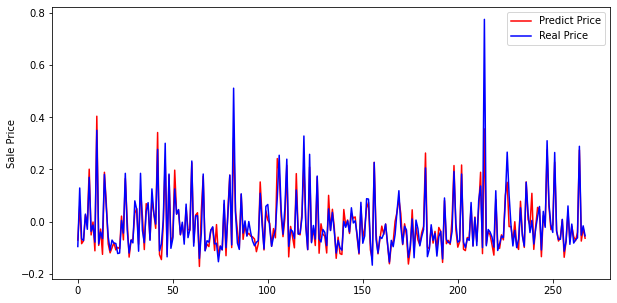

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure containing a single axes.
ax.plot(range(LR_valid_pred.shape[0]), LR_valid_pred, label='Predict Price', color="red")
ax.plot(range(PreP_df_valid_price.shape[0]), PreP_df_valid_price, label='Real Price', color="blue")
ax.legend()
ax.set_ylabel('Sale Price')
plt.show()

I use the validation set to evaluate my model. My evaluation metric is using mean squared error. The MSE in my model is 0.0019, which is OK. I also print the plot for predict price and real price for validation set to compare the differece.


### Do you see a difference in the value of the evaluation metric between train and test data sets?

In [ ]:
# Predict the sale price for trainning set
LR_train_pred = df_LR.predict(PreP_df_train)

In [ ]:
print("Valid set mean squared error:", mean_squared_error(PreP_df_valid_price, LR_valid_pred))
print("Tranning set mean squared error:", mean_squared_error(PreP_df_train_price, LR_train_pred))


Valid set mean squared error: 0.0017506173148737851
Tranning set mean squared error: 0.0010842458222778528


Yes, The MSE for tain and test data set is different.

### Would you suspect over-fitting and why?

I do think I have some over-fitting. because the MSE for validation set is twice bigger than MSE for train data set. Also, sometime the MSE for validation data will go to a very huge number.

### Fix Over-fitting

To fix the over-fitting, I use the Lass and Ridge, see the MSE with different hyper-parameter alpha.

#### Ridge

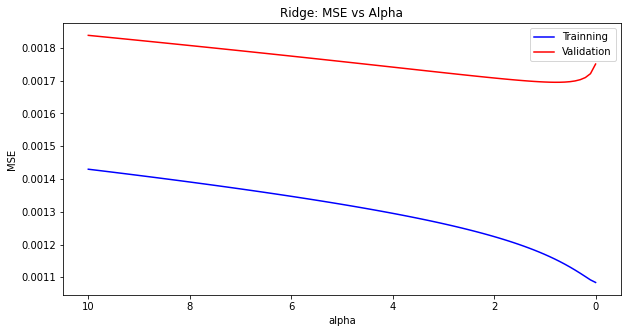

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

def ridge_MSE(a):
    mse_valid = list()
    mse_train = list()
    for i in a:
        # Igore the convergence warning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=ConvergenceWarning)

            df_ridge = linear_model.Ridge(alpha=i)
            df_ridge.fit(PreP_df_train, PreP_df_train_price)
            ridge_valid_pred = df_ridge.predict(PreP_df_valid)
            ridge_train_pred = df_ridge.predict(PreP_df_train)
            mse_valid += [mean_squared_error(PreP_df_valid_price, ridge_valid_pred)]
            mse_train += [mean_squared_error(PreP_df_train_price, ridge_train_pred)]

    return mse_train, mse_valid

a = np.linspace(10,0.000001,100)

fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure containing a single axes.
ax.plot(a, ridge_MSE(a)[0], label='Trainning', color="blue")
ax.plot(a, ridge_MSE(a)[1], label='Validation', color="red")
ax.legend()
ax.set_ylabel('MSE')
ax.set_xlabel('alpha')
ax.set_title('Ridge: MSE vs Alpha')
ax.invert_xaxis()
plt.show()

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

def Coef(a):

    coef = list()
    for i in a:
        # Igore the convergence warning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=ConvergenceWarning)

            df_ridge = linear_model.Ridge(alpha=i)
            df_ridge.fit(PreP_df_train, PreP_df_train_price)
            coef += df_ridge.coef_


    return mse_train, mse_valid, return coef

a = np.linspace(10,0.000001,100)

fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure containing a single axes.
ax.plot(a, ridge_MSE(a)[0], label='Trainning', color="blue")
ax.plot(a, ridge_MSE(a)[1], label='Validation', color="red")
ax.legend()
ax.set_ylabel('MSE')
ax.set_xlabel('alpha')
ax.set_title('Ridge: MSE vs Alpha')
ax.invert_xaxis()
plt.show()

#### Ridge: Which hyper-parameter values gives you the lowest error?

For Ridge, alpho = 1.2 gives me a lowerst error 

#### Lasso

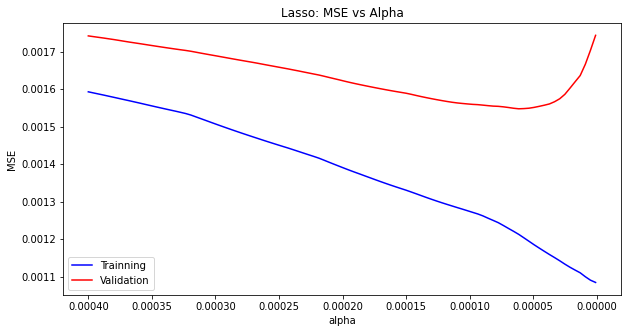

In [ ]:
def lasso_MSE(a):
    mse_valid = list()
    mse_train = list()
    for i in a:
        # Igore the convergence warning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=ConvergenceWarning)

            df_lasso = linear_model.Lasso(alpha=i)
            df_lasso.fit(PreP_df_train, PreP_df_train_price)
            lasso_valid_pred = df_lasso.predict(PreP_df_valid)
            lasso_train_pred = df_lasso.predict(PreP_df_train)
            mse_valid += [mean_squared_error(PreP_df_valid_price, lasso_valid_pred)]
            mse_train += [mean_squared_error(PreP_df_train_price, lasso_train_pred)]

    return mse_train, mse_valid

a = np.linspace(0.0004,0.000001,100)

fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure containing a single axes.
ax.plot(a, lasso_MSE(a)[0], label='Trainning', color="blue")
ax.plot(a, lasso_MSE(a)[1], label='Validation', color="red")
ax.legend()
ax.set_ylabel('MSE')
ax.set_xlabel('alpha')
ax.set_title('Lasso: MSE vs Alpha')
ax.invert_xaxis()
plt.show()

#### Lasso: Which hyper-parameter values gives you the lowest error?

For Lasso, alpho = 0.00001 gives me a lowerst error 

### Important Attributes


In [ ]:
weights = list(df_LR.coef_)
weights_abs = np.abs(weights)

indices = (-weights_abs).argsort()[:10]

attributes = list(PreP_df_train.columns)

for i in indices:
    print(attributes[i])



Condition2_PosN
RoofMatl_WdShngl
GarageQual_Po
LotArea
GarageQual_Fa
GarageQual_TA
GrLivArea
RoofMatl_CompShg
1stFlrSF
GarageQual_Gd


As can be seen from the above list, in the linear regression model, the house material, house area and house condition are all factors to be considered, which is in line with the reality

### What’s the R2 coefficient for your linear model?

In [ ]:
# Linear Regression
print('The R^2 coefficient for linear regression model is:', df_LR.score(PreP_df_train,PreP_df_train_price))

the R^2 coefficient for linear regression model is: 0.9067119894074976


In [ ]:
# Ridge
df_ridge = linear_model.Ridge(alpha=0.5)
df_ridge.fit(PreP_df_train, PreP_df_train_price)

print('The R^2 coefficient for ridge regression model is:', df_ridge.score(PreP_df_train,PreP_df_train_price))

The R^2 coefficient for ridge regression model is: 0.9027087061649961


In [ ]:
# Lasso
df_lasso = linear_model.Lasso(alpha=0.00005)
df_lasso.fit(PreP_df_train, PreP_df_train_price)

print('The R^2 coefficient for ridge regression model is:', df_lasso.score(PreP_df_train,PreP_df_train_price))

The R^2 coefficient for ridge regression model is: 0.897910695077595


## Result in test dataset

### Linear Regression

Mean squared error: 0.0010572557706637314


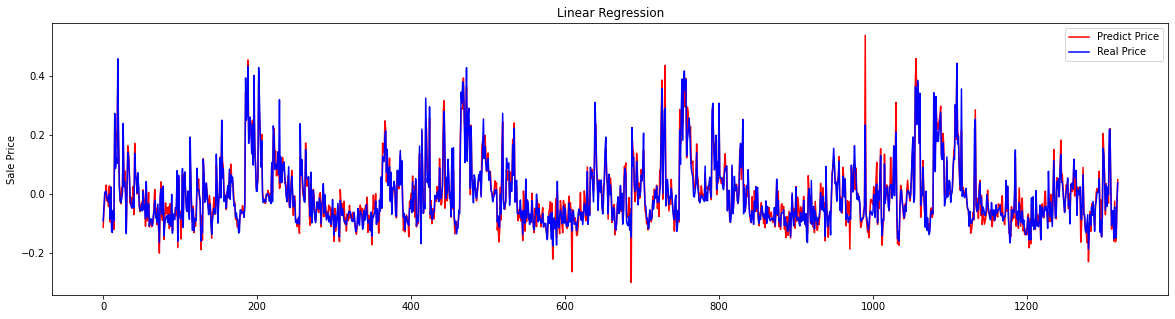

In [ ]:
LR_test_pred = df_LR.predict(PreP_df_test)
print("Mean squared error:", mean_squared_error(PreP_df_test_price, LR_test_pred))

fig, ax = plt.subplots(figsize=(20, 5))  # Create a figure containing a single axes.
ax.plot(range(LR_test_pred.shape[0]), LR_test_pred, label='Predict Price', color="red")
ax.plot(range(PreP_df_test_price.shape[0]), PreP_df_test_price, label='Real Price', color="blue")
ax.legend()
ax.set_ylabel('Sale Price')
ax.set_title('Linear Regression')
plt.show()

### Ridge Regression

Mean squared error: 0.000909994090322181


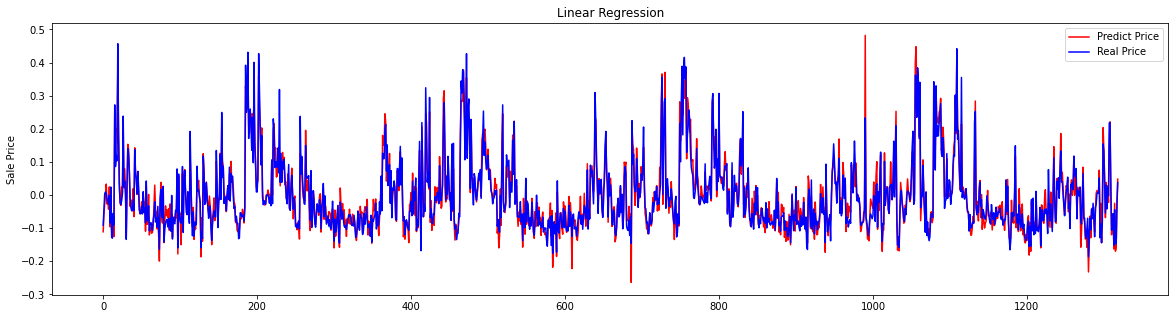

In [ ]:
ridge_test_pred = df_ridge.predict(PreP_df_test)
print("Mean squared error:", mean_squared_error(PreP_df_test_price, ridge_test_pred))

fig, ax = plt.subplots(figsize=(20, 5))  # Create a figure containing a single axes.
ax.plot(range(LR_test_pred.shape[0]), ridge_test_pred, label='Predict Price', color="red")
ax.plot(range(PreP_df_test_price.shape[0]), PreP_df_test_price, label='Real Price', color="blue")
ax.legend()
ax.set_ylabel('Sale Price')
ax.set_title('Linear Regression')
plt.show()

### Lasso Regression

Mean squared error: 0.0008254419786656569


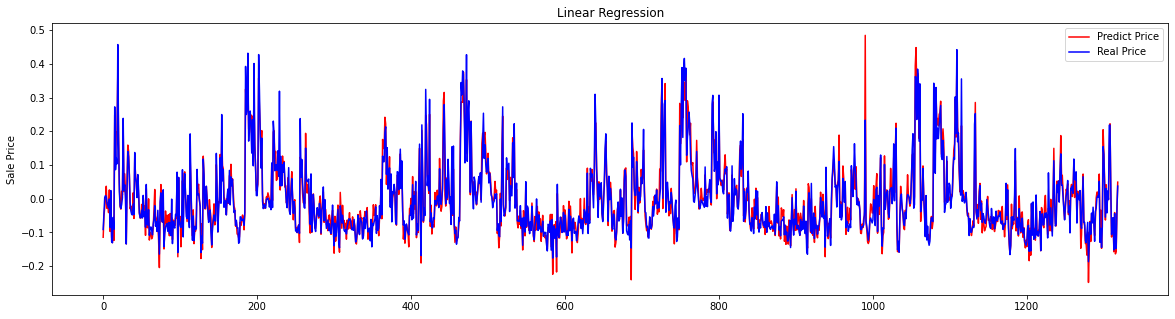

In [ ]:
lasso_test_pred = df_lasso.predict(PreP_df_test)
print("Mean squared error:", mean_squared_error(PreP_df_test_price, lasso_test_pred))

fig, ax = plt.subplots(figsize=(20, 5))  # Create a figure containing a single axes.
ax.plot(range(LR_test_pred.shape[0]), lasso_test_pred, label='Predict Price', color="red")
ax.plot(range(PreP_df_test_price.shape[0]), PreP_df_test_price, label='Real Price', color="blue")
ax.legend()
ax.set_ylabel('Sale Price')
ax.set_title('Linear Regression')
plt.show()